# Estadistica Descriptiva.

1-Tipos de datos

2- Pipe line de procesamiento

3- Anlisis exploraotorio, estadistica descriptiva, correlaciones, reduccion de datos.

4- Probabilidad e inferencia.

5- Test de hipotesis.


¿Cuáles serán los puntos específicos que vamos a tratar en este curso?
999
Primera parte del curso: Vamos a abordar cuales son los elementos de estadística la descriptiva para la ingesta y el procesamiento de los datos.
.

888
Segunda parte del curso: Vamos a ver análisis exploratorio de los datos, identificar correlaciones de los datos, abordaremos si a partir de eso podemos reducir el conjunto de datos que necesitamos para un modelo, por ejemplo. Entonces, el objetivo es abordar los estadísticos para exploración y analítica.

## Tipos de datos

#### Categoricos.

(genero,categoria de pelicula, metodo de pago)
-> ordinal
-> nominal



#### Numericos

(Edad,altura,temperatura)

-> discretos
-> continuos

In [2]:
import pandas as pd

In [3]:
data_cars = pd.read_csv('./cars.csv')
data_cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
#Estadistica descriptiva rapida en pandas.
data_cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


## Medidas de tendencia central.

-> Media(Promedio)

-> Mediana(Dato central)

-> Moda(Dato que mas se repite)



## Diagrama de frecuencias.
![Alt text](2023-02-15_09h18_18.png)


## ¿Cuando usar cual?

-> La media es susceptible a valores atipicos.

-> La moda no aplica para datos numericos continuos.


## Metafora de Bill Gates en un bar.

![Alt text](2023-02-15_09h22_52.png)
![Alt text](2023-02-15_09h26_02.png)

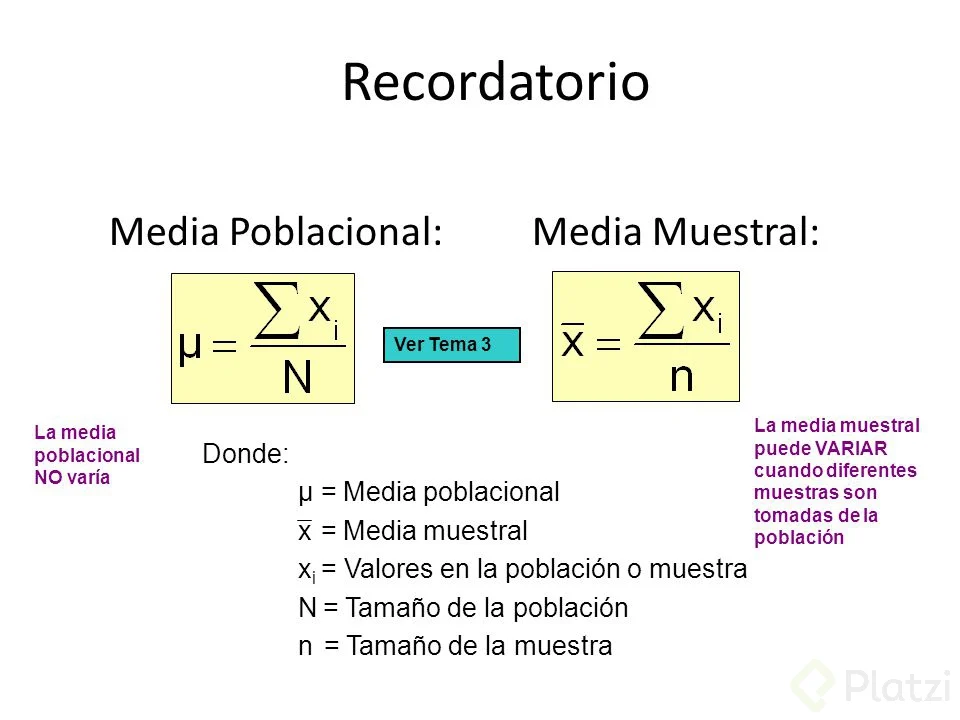

La media y/o promedio se ve mas sesgado por valores atipicos que la mediana.

## Medidas de tendencia central en python.

![Alt text](2023-02-15_09h34_25.png)

In [8]:
#Media en el precio de autos.
data_cars['price_usd'].mean()


6639.971021255613

In [10]:
#Mediana en el precio de autos.

data_cars['price_usd'].median()

4800.0

<AxesSubplot: ylabel='Frequency'>

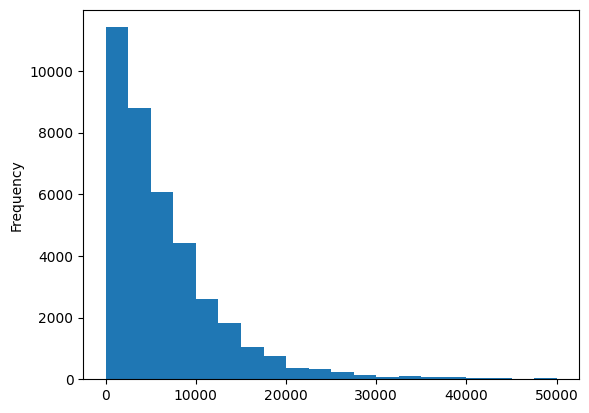

In [13]:
#Histograma en precios de autos con pandas.
data_cars['price_usd'].plot.hist(bins=20)

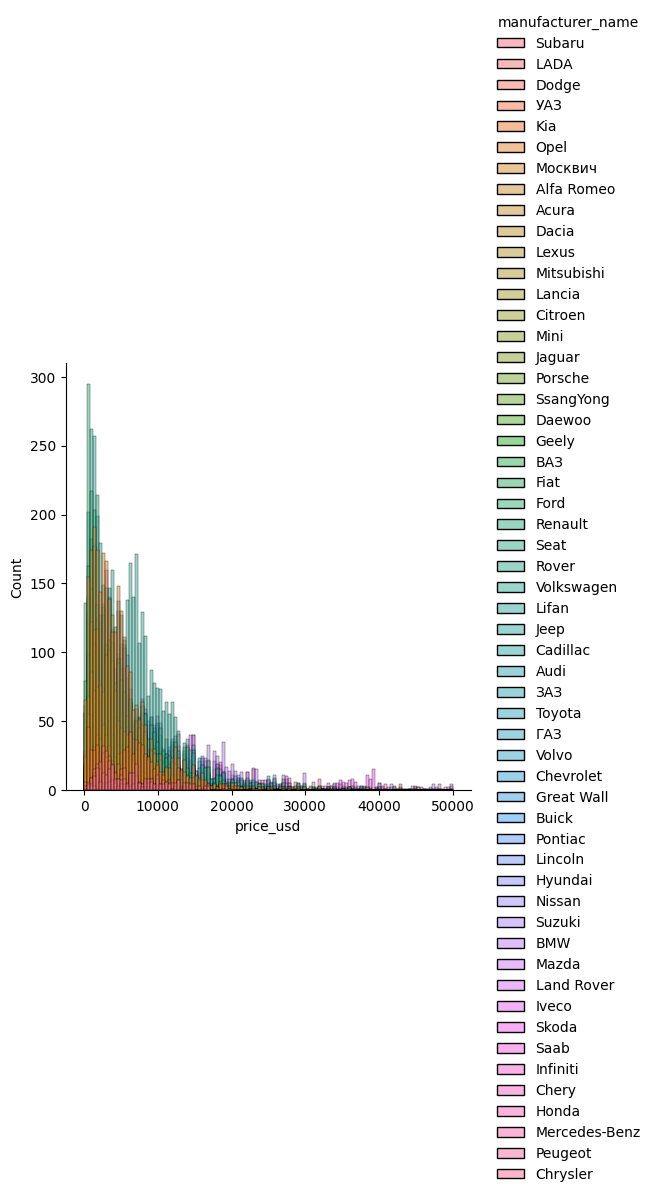

In [14]:
import seaborn as sns
sns.displot(
    data_cars,
    x = 'price_usd',
    hue = 'manufacturer_name')

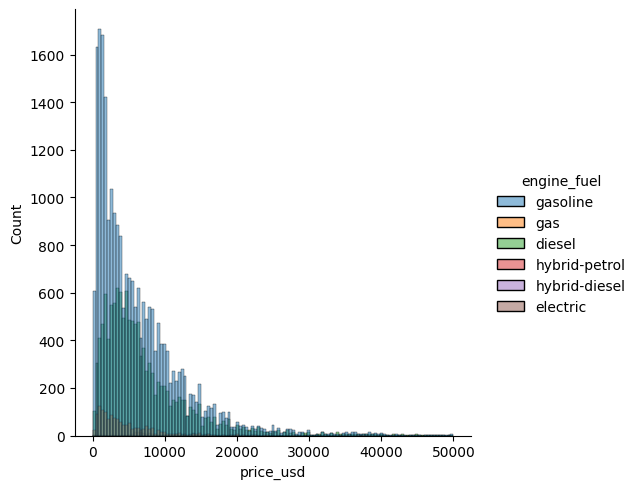

In [17]:
sns.displot(
    data_cars,
    x = 'price_usd',
    hue = 'engine_fuel')

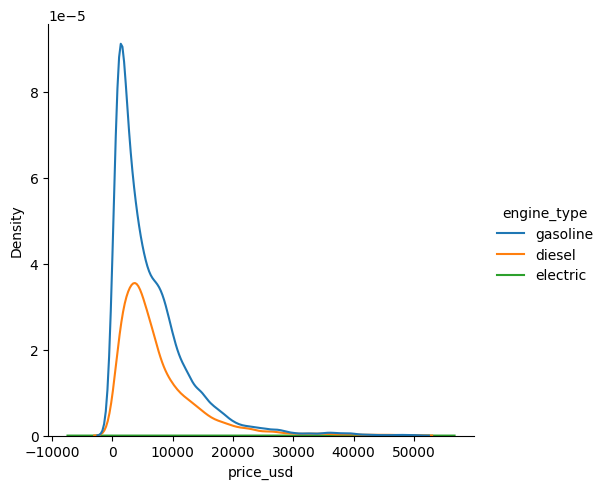

In [20]:
sns.displot(
    data_cars,
    x = 'price_usd',
    hue = 'engine_type',
    kind = 'kde'
)

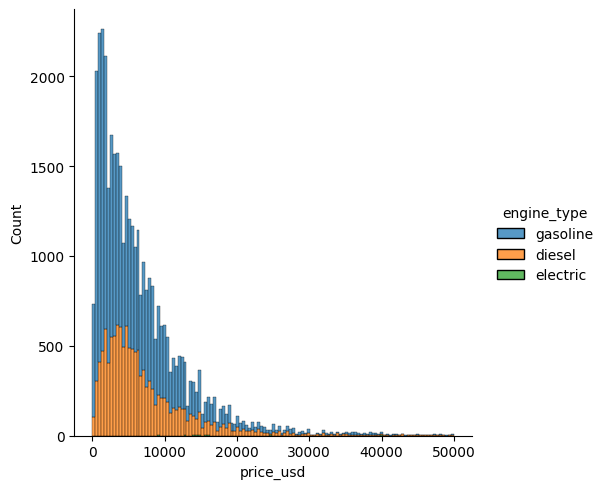

In [21]:
sns.displot(
    data_cars,
    x = 'price_usd',
    hue = 'engine_type',
    multiple = 'stack'
    
)

In [22]:
#Contar el numero de datos.
data_cars.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


In [24]:
#Filtrar por autos audi.
Q7_df = data_cars[(data_cars['manufacturer_name'] == 'Audi') & (data_cars['model_name'] == 'Q7')]
Q7_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
19515,Audi,Q7,automatic,grey,275000,2007,diesel,False,diesel,3.0,...,False,False,False,False,False,False,False,False,False,21
19547,Audi,Q7,automatic,white,105000,2014,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,216
19559,Audi,Q7,automatic,other,170000,2006,diesel,False,diesel,3.0,...,True,True,True,True,True,False,True,False,True,24
19574,Audi,Q7,automatic,black,185000,2016,diesel,False,diesel,3.0,...,False,False,True,True,True,True,True,True,True,7
19583,Audi,Q7,automatic,other,210000,2010,diesel,False,diesel,4.2,...,True,True,True,False,True,True,True,True,True,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,Audi,Q7,automatic,silver,200000,2008,gasoline,False,gasoline,3.6,...,True,True,True,True,True,True,True,True,True,91
21812,Audi,Q7,automatic,black,276000,2008,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,115
21873,Audi,Q7,automatic,black,273000,2006,gasoline,False,gasoline,4.2,...,True,True,False,True,True,True,True,False,True,147
21900,Audi,Q7,automatic,white,283000,2007,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,159


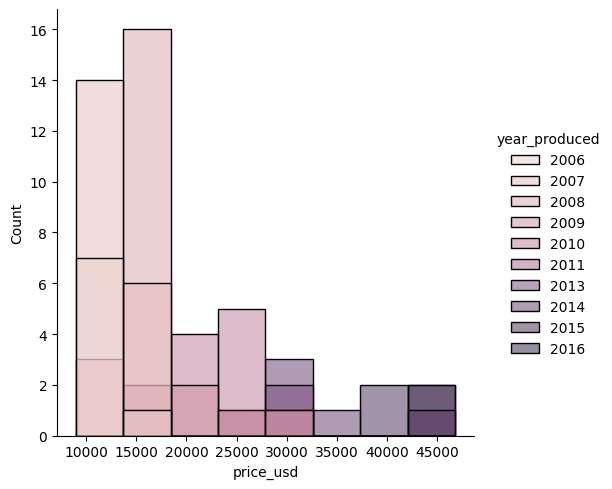

In [27]:
sns.displot(Q7_df,x = 'price_usd', hue = 'year_produced')

In [43]:
#Filtrar ford mustang

BMW_df = data_cars[(data_cars['manufacturer_name'] == 'BMW') & (data_cars['model_name'] == 'X6')]
BMW_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
27502,BMW,X6,automatic,red,127000,2015,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,95
27514,BMW,X6,automatic,white,94635,2012,gasoline,False,gasoline,3.0,...,False,True,True,True,True,True,True,True,True,84
27536,BMW,X6,automatic,black,277000,2009,diesel,False,diesel,3.5,...,False,True,True,True,True,True,True,False,True,9
27594,BMW,X6,automatic,blue,156000,2010,hybrid-petrol,False,gasoline,4.4,...,True,True,True,True,True,True,True,True,True,90
27595,BMW,X6,automatic,black,210000,2011,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29856,BMW,X6,automatic,black,157000,2010,gasoline,False,gasoline,3.5,...,True,True,True,True,True,False,True,True,True,88
29967,BMW,X6,automatic,blue,94000,2015,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,137
30037,BMW,X6,automatic,blue,149000,2008,gasoline,False,gasoline,3.0,...,True,True,True,True,True,True,True,True,True,171
30040,BMW,X6,automatic,white,116000,2010,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,True,172


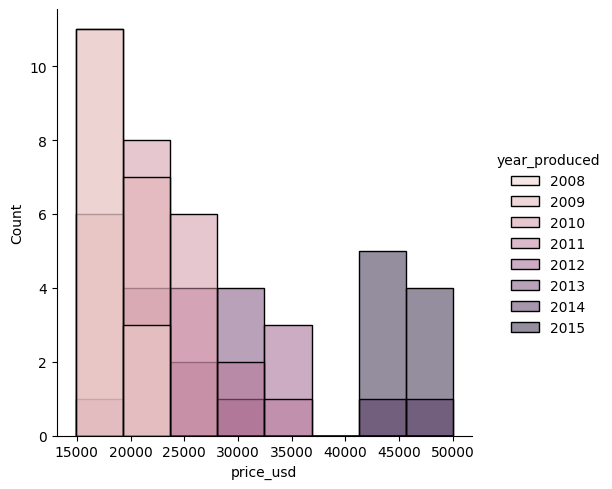

In [45]:
sns.displot(BMW_df,x = 'price_usd', hue ='year_produced')